In [52]:
import networkx as nx
from itertools import combinations, groupby
import random
import matplotlib.pyplot as plt
import pandas as pd
from typing import List, Dict, Tuple
import numpy as np

pd.set_option('precision', 2)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [78]:
def gnp_random_connected_graph(n, p):
    """
    Generates a random undirected graph, similarly to an Erdős-Rényi 
    graph, but enforcing that the resulting graph is conneted
    """
    edges = combinations(range(n), 2)
    G = nx.Graph()
    G.add_nodes_from(range(n))
    if p <= 0:
        return G
    if p >= 1:
        return nx.complete_graph(n, create_using=G)
    for _, node_edges in groupby(edges, key=lambda x: x[0]):
        node_edges = list(node_edges)
        random_edge = random.choice(node_edges)
        G.add_edge(*random_edge)
        for e in node_edges:
            if random.random() < p:
                G.add_edge(*e)
    return G

def get_stochastic_neighbour_matrix(nxg: nx.Graph = None, adjacency_matrix: List[List[int]] = None) -> List[List[float]]:
        """
        Creates a stochastic adjacency matrix for a specified graph: g, each row represents a node in the graph
        where the values in each column represents if there is an edge or not between those nodes.
        The values for each neighbour is represented by 1/(number of neighbours), if no edge exists this value is 0.

        :param nxg: Networkx bi-directional graph object.
        :type nxg: nx.Graph
        :param adjacency_matrix: Self assigned adjacency matrix.
        :type adjacency_matrix: List[List[int]]
        :return A: List of rows, representing the adjacency matrix.
        :rtype: List[List[float]]
        """
        if nxg is None and adjacency_matrix is None:
            raise ValueError('At least one parameter of nxg or adjacency_matrix needs to be provided')

        # If we wasn't provided with the adjacency matrix, get it.
        if adjacency_matrix is None:
            # Get the adjacency matrix
            adjacency_matrix = nx.to_pandas_adjacency(G, dtype=int)

        mx = []

        # Iterate over each row
        for row_id, _ in enumerate(adjacency_matrix):
            # Calculate the sum for each row
            row_sum = sum(adjacency_matrix[row_id])
            # Divide each node in the row with the sum of the row
            mx.append(list(map(lambda x: (x / row_sum), adjacency_matrix[row_id])))

        # Working solution that might however be worse than the previous solution.
        # mx = list(map(lambda row: list(map(lambda cell: cell / sum(row), row)), mx))

        return pd.DataFrame(mx)

### Random undirected graph $G$

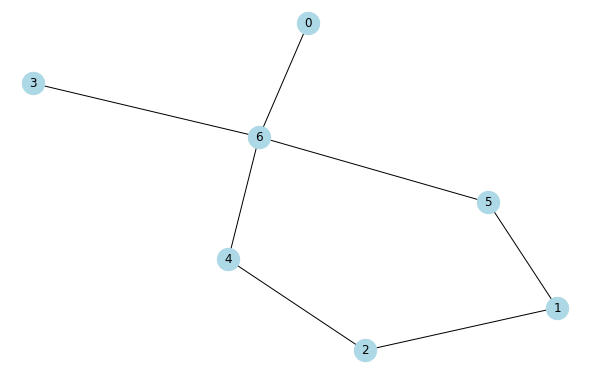

In [135]:
nodes = 7
seed = random.randint(1,10)
probability = 0.1
G = gnp_random_connected_graph(nodes,probability)

plt.figure(figsize=(8,5))
nx.draw(G, node_color='lightblue', 
        with_labels=True, 
        node_size=500)


### Adjacency Matrix $A$ of $G$

In [136]:
A = nx.to_pandas_adjacency(G, dtype=int)
A

,0,1,2,3,4,5,6
0,0,0,0,0,0,0,1
1,0,0,1,0,0,1,0
2,0,1,0,0,1,0,0
3,0,0,0,0,0,0,1
4,0,0,1,0,0,0,1
5,0,1,0,0,0,0,1
6,1,0,0,1,1,1,0


### Stochasitc Matrix $A_{s}$ of $G$

In [141]:
A_s = get_stochastic_neighbour_matrix(G)
A_s.style.format('{:.16f}')
A_s

,0,1,2,3,4,5,6
0,0.000,0.000,0.000,0.000,0.000,0.000,1.000
1,0.000,0.000,0.500,0.000,0.000,0.500,0.000
2,0.000,0.500,0.000,0.000,0.500,0.000,0.000
3,0.000,0.000,0.000,0.000,0.000,0.000,1.000
4,0.000,0.000,0.500,0.000,0.000,0.000,0.500
5,0.000,0.500,0.000,0.000,0.000,0.000,0.500
6,0.250,0.000,0.000,0.250,0.250,0.250,0.000


### Stochasitc Matrix $A_{s}^2$ of $G$

In [142]:
A_s = A_s.dot(A_s)
A_s

,0,1,2,3,4,5,6
0,0.250,0.000,0.000,0.250,0.250,0.250,0.000
1,0.000,0.500,0.000,0.000,0.250,0.000,0.250
2,0.000,0.000,0.500,0.000,0.000,0.250,0.250
3,0.250,0.000,0.000,0.250,0.250,0.250,0.000
4,0.125,0.250,0.000,0.125,0.375,0.125,0.000
5,0.125,0.000,0.250,0.125,0.125,0.375,0.000
6,0.000,0.125,0.125,0.000,0.000,0.000,0.750


### Stochasitc Matrix $A_{s}^3$ of $G$

In [143]:
A_s = A_s.dot(A_s)
A_s

,0,1,2,3,4,5,6
0,0.188,0.062,0.062,0.188,0.250,0.250,0.000
1,0.031,0.344,0.031,0.031,0.219,0.031,0.312
2,0.031,0.031,0.344,0.031,0.031,0.219,0.312
3,0.188,0.062,0.062,0.188,0.250,0.250,0.000
4,0.125,0.219,0.031,0.125,0.281,0.156,0.062
5,0.125,0.031,0.219,0.125,0.156,0.281,0.062
6,0.000,0.156,0.156,0.000,0.031,0.031,0.625


In [144]:
for i in range(10):
    A_s = A_s.dot(A_s)

In [145]:
A_s

,0,1,2,3,4,5,6
0,0.071,0.143,0.143,0.071,0.143,0.143,0.286
1,0.071,0.143,0.143,0.071,0.143,0.143,0.286
2,0.071,0.143,0.143,0.071,0.143,0.143,0.286
3,0.071,0.143,0.143,0.071,0.143,0.143,0.286
4,0.071,0.143,0.143,0.071,0.143,0.143,0.286
5,0.071,0.143,0.143,0.071,0.143,0.143,0.286
6,0.071,0.143,0.143,0.071,0.143,0.143,0.286
